<h1>Linear Feedback Shift Register<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5-bit-LFSR" data-toc-modified-id="5-bit-LFSR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>5-bit LFSR</a></span></li><li><span><a href="#with-custom-feedback-and-initial-state" data-toc-modified-id="with-custom-feedback-and-initial-state-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>with custom feedback and initial state</a></span></li><li><span><a href="#Print-at-each-step" data-toc-modified-id="Print-at-each-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Print at each step</a></span><ul class="toc-item"><li><span><a href="#with-default-counter_start_zero-=-True" data-toc-modified-id="with-default-counter_start_zero-=-True-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>with default counter_start_zero = True</a></span></li><li><span><a href="#with-counter_start_zero-=-False" data-toc-modified-id="with-counter_start_zero-=-False-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>with counter_start_zero = False</a></span></li></ul></li><li><span><a href="#23-bit-LFSR" data-toc-modified-id="23-bit-LFSR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>23-bit LFSR</a></span></li><li><span><a href="#Testing-properties-of-LFSR" data-toc-modified-id="Testing-properties-of-LFSR-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing properties of LFSR</a></span><ul class="toc-item"><li><span><a href="#All-tests-together" data-toc-modified-id="All-tests-together-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>All tests together</a></span></li><li><span><a href="#Individual-test-for-a-period" data-toc-modified-id="Individual-test-for-a-period-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Individual test for a period</a></span></li><li><span><a href="#Testing-properties-for-non-primitive-polynomial" data-toc-modified-id="Testing-properties-for-non-primitive-polynomial-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing properties for non-primitive polynomial</a></span></li></ul></li><li><span><a href="#Get-a-list-of-feedback-polynomials-for-m-bit-LFSR" data-toc-modified-id="Get-a-list-of-feedback-polynomials-for-m-bit-LFSR-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get a list of feedback polynomials for m-bit LFSR</a></span></li><li><span><a href="#Changing-feedback-polynomial-in-between" data-toc-modified-id="Changing-feedback-polynomial-in-between-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Changing feedback polynomial in between</a></span></li><li><span><a href="#A5/1-GSM-Stream-Cipher" data-toc-modified-id="A5/1-GSM-Stream-Cipher-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>A5/1 GSM Stream Cipher</a></span></li><li><span><a href="#Full-LFSR-Capabilities" data-toc-modified-id="Full-LFSR-Capabilities-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Full LFSR Capabilities</a></span></li></ul></div>

In [4]:
import numpy as np

import spkit
print('spkit version : ',spkit.__version__)
from spkit.pylfsr import LFSR

#or from pylfsr import LFSR (if you installed pylfsr==1.0.5)

spkit version :  0.0.9.4


# 5-bit LFSR

In [5]:
L = LFSR()
L.info()

5 bit LFSR with feedback polynomial  x^5 + x^2 + 1
Expected Period (if polynomial is primitive) =  31
Current :
 State        :  [1 1 1 1 1]
 Count        :  0
 Output bit   :  -1
 feedback bit :  -1


In [6]:
L.next()
L.info()

5 bit LFSR with feedback polynomial  x^5 + x^2 + 1
Expected Period (if polynomial is primitive) =  31
Current :
 State        :  [0 1 1 1 1]
 Count        :  1
 Output bit   :  1
 feedback bit :  0
 Output Sequence 1


In [7]:
L.runKCycle(10)
L.info()

5 bit LFSR with feedback polynomial  x^5 + x^2 + 1
Expected Period (if polynomial is primitive) =  31
Current :
 State        :  [0 0 1 0 0]
 Count        :  11
 Output bit   :  1
 feedback bit :  0
 Output Sequence 11111001101


In [8]:
L.seq

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

# with custom feedback and initial state

In [9]:
state = [0,0,0,1,0]
fpoly = [5,4,3,2]
L = LFSR(fpoly=fpoly,initstate =state, verbose=True)
L.info()
tempseq = L.runKCycle(10)
tempseq

5 bit LFSR with feedback polynomial  x^5 + x^4 + x^3 + x^2 + 1
Expected Period (if polynomial is primitive) =  31
Current :
 State        :  [0 0 0 1 0]
 Count        :  0
 Output bit   :  -1
 feedback bit :  -1
S:  [0 0 0 1 0]
S:  [1 0 0 0 1]
S:  [1 1 0 0 0]
S:  [1 1 1 0 0]
S:  [0 1 1 1 0]
S:  [1 0 1 1 1]
S:  [1 1 0 1 1]
S:  [1 1 1 0 1]
S:  [1 1 1 1 0]
S:  [1 1 1 1 1]


array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

# Print at each step

## with default counter_start_zero = True

In [10]:
state = [1,1,1]
fpoly = [3,2]
L = LFSR(initstate=state,fpoly=fpoly)
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(15):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
0	[1 1 1]		-1	[-1]
1	[0 1 1]		1	[1]
2	[0 0 1]		1	[1 1]
3	[1 0 0]		1	[1 1 1]
4	[0 1 0]		0	[1 1 1 0]
5	[1 0 1]		0	[1 1 1 0 0]
6	[1 1 0]		1	[1 1 1 0 0 1]
7	[1 1 1]		0	[1 1 1 0 0 1 0]
8	[0 1 1]		1	[1 1 1 0 0 1 0 1]
9	[0 0 1]		1	[1 1 1 0 0 1 0 1 1]
10	[1 0 0]		1	[1 1 1 0 0 1 0 1 1 1]
11	[0 1 0]		0	[1 1 1 0 0 1 0 1 1 1 0]
12	[1 0 1]		0	[1 1 1 0 0 1 0 1 1 1 0 0]
13	[1 1 0]		1	[1 1 1 0 0 1 0 1 1 1 0 0 1]
14	[1 1 1]		0	[1 1 1 0 0 1 0 1 1 1 0 0 1 0]
--------------------------------------------------
Output:  [1 1 1 0 0 1 0 1 1 1 0 0 1 0 1]


##  with counter_start_zero = False

In [11]:
state = [1,1,1]
fpoly = [3,2]
L = LFSR(initstate=state,fpoly=fpoly,counter_start_zero=False)
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(14):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
1	[1 1 1]		1	[1]
2	[0 1 1]		1	[1 1]
3	[0 0 1]		1	[1 1 1]
4	[1 0 0]		1	[1 1 1 0]
5	[0 1 0]		0	[1 1 1 0 0]
6	[1 0 1]		0	[1 1 1 0 0 1]
7	[1 1 0]		1	[1 1 1 0 0 1 0]
8	[1 1 1]		0	[1 1 1 0 0 1 0 1]
9	[0 1 1]		1	[1 1 1 0 0 1 0 1 1]
10	[0 0 1]		1	[1 1 1 0 0 1 0 1 1 1]
11	[1 0 0]		1	[1 1 1 0 0 1 0 1 1 1 0]
12	[0 1 0]		0	[1 1 1 0 0 1 0 1 1 1 0 0]
13	[1 0 1]		0	[1 1 1 0 0 1 0 1 1 1 0 0 1]
14	[1 1 0]		1	[1 1 1 0 0 1 0 1 1 1 0 0 1 0]
--------------------------------------------------
Output:  [1 1 1 0 0 1 0 1 1 1 0 0 1 0 1]


# 23-bit LFSR

In [12]:
fpoly = [23,19]
L1 = LFSR(fpoly=fpoly,initstate ='ones', verbose=False)
L1.info()

23 bit LFSR with feedback polynomial  x^23 + x^19 + 1
Expected Period (if polynomial is primitive) =  8388607
Current :
 State        :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 Count        :  0
 Output bit   :  -1
 feedback bit :  -1


In [13]:
seq = L1.runKCycle(100)
seq

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# Testing properties of LFSR

## All tests together

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period): (N1s,N0s) =  (16, 15)
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs in a period should be of specific order, e.g. [4,2,1,1]
 - Runs:  [8 4 2 1 1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else
 - Rxx(k):  [ 1.         -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806  1.         -0.03225806 -0.03225806 -0.03225806 -0.03225806
 -0.03225806 -0.03225806 -0.03225806 -0

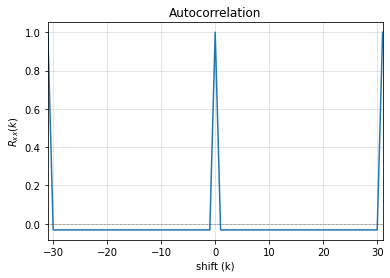

 - Pass?:  True



Passed all the tests


In [14]:
state = [1,1,1,1,0]
fpoly = [5,3]
L = LFSR(initstate=state,fpoly=fpoly)
result  = L.test_properties(verbose=2)

## Individual test for a period

In [15]:
state = [1,1,1,1,0]
fpoly = [5,3]
L = LFSR(initstate=state,fpoly=fpoly)

p = L.getFullPeriod() # 
p

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0])

In [16]:
L.balance_property(p.copy())

(True, (16, 15))

In [17]:
L.runlength_property(p.copy())

(True, array([8, 4, 2, 1, 1]))

In [18]:
L.autocorr_property(p.copy())[0]

True

## Testing properties for non-primitive polynomial

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  False

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period): (N1s,N0s) =  (17, 14)
 - Pass?:  False

3. Runlength Property
-------------------
 - Number of Runs in a period should be of specific order, e.g. [4,2,1,1]
 - Runs:  [10  2  1  1  2]
 - Pass?:  False

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else
 - Rxx(k):  [ 1.         -0.03225806  0.22580645 -0.16129032  0.09677419 -0.03225806
 -0.03225806 -0.29032258  0.22580645 -0.16129032  0.35483871 -0.03225806
 -0.03225806 -0.03225806 -0.29032258 -0.16129032 -0.16129032 -0.29032258
 -0.03225806 -0.03225806 -0.03225806  0.35483871 -0.16129032  0.22580645
 -0.29032258 -0.03225806 -0.03225806  0.09677419 -0.16129032  0.22580645
 -0.03225806  1.         -0.03225806  0.22580645 -0.16129032  0.09677419
 -0.03225806 -0.03225806 -0.290

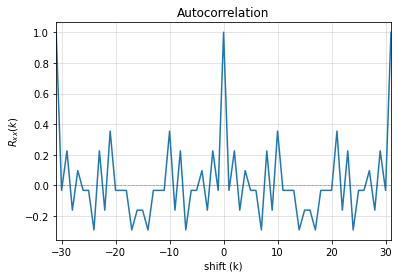

 - Pass?:  False



Failed one or more tests, check if feedback polynomial is primitive polynomial


In [19]:
state = [1,1,1,1,0]
fpoly = [5,1]
L = LFSR(initstate=state,fpoly=fpoly)
result = L.test_properties(verbose=2)

# Get a list of feedback polynomials for m-bit LFSR

In [20]:
L = LFSR()

# list of 5-bit feedback polynomials
fpoly = L.get_fpolyList(m=5)
fpoly

[[5, 2], [5, 4, 2, 1], [5, 4, 3, 2]]

In [21]:
# list of all feedback polynomials as a dictionary
fpolyDict = L.get_fpolyList()

# Changing feedback polynomial in between

In [22]:
fpoly = [23,19]
L = LFSR(fpoly=fpoly,initstate ='ones', verbose=False)

seq0 = L.runKCycle(20)
L.info()

print('\nChange to [23,14]\n')
L.changeFpoly(newfpoly =[23,14],reset=False)
seq1 = L.runKCycle(20)
L.info()

print('\nChange to [23,9]\n')
# Change after 20 clocks
L.changeFpoly(newfpoly =[23,9],reset=False)
seq2 = L.runKCycle(20)

L.info()

23 bit LFSR with feedback polynomial  x^23 + x^19 + 1
Expected Period (if polynomial is primitive) =  8388607
Current :
 State        :  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 Count        :  20
 Output bit   :  1
 feedback bit :  1
 Output Sequence 11111111111111111111

Change to [23,14]

23 bit LFSR with feedback polynomial  x^23 + x^14 + 1
Expected Period (if polynomial is primitive) =  8388607
Current :
 State        :  [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
 Count        :  40
 Output bit   :  0
 feedback bit :  0
 Output Sequence 1111111111111111111111100000000000000000

Change to [23,9]

23 bit LFSR with feedback polynomial  x^23 + x^9 + 1
Expected Period (if polynomial is primitive) =  8388607
Current :
 State        :  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 Count        :  60
 Output bit   :  1
 feedback bit :  1
 Output Sequence 111111111111111111111110000000000000000000111100000000001111


# A5/1 GSM Stream Cipher

Reference Article: Enhancement of A5/1: https://doi.org/10.1109/ETNCC.2011.5958486

In [23]:
# Three LFSRs initialzed with 'ones' though they are intialized with encription key
R1 = LFSR(fpoly = [19,18,17,14])
R2 = LFSR(fpoly = [23,22,21,8])
R3 = LFSR(fpoly = [22,21])

# clocking bits
b1 = R1.state[8]
b2 = R1.state[10]
b3 = R1.state[10]

# Full LFSR Capabilities

 For full and updated version of LFSR, use [pylfsr](https://pypi.org/project/pylfsr/) instead of spkit.pylfsr

Here is the documentation link - [pylfsr](https://lfsr.readthedocs.io/)